
### Decision Trees 

### What if our data looked like this? 

![](../images/complex.png)

* We could develop complicated models (e.g., deep learning neural networks to solve the problem of separating the two classes of data)
* It would be desirable to build models of data that allow for complex decision boundaries while maintaining intepretability. 

### What is a decision tree?  

At its heart, a decision tree is a flow chart. 

* Formally, a decision tree model is one in which the final outcome of the model is based on a series of comparisons of the values of predictors against threshold values.
* In a graphical representation (flow chart),
    * the internal nodes of the tree represent attribute testing.
    * branching in the next level is determined by attribute value.
    * terminal leaf nodes represent class assignments.

![](../images/orangelemon.png)



### Given a training set, learning a decision tree model for binary classification means:
* producing an optimal partition of the feature space with axis-aligned linear boundaries (maximally interpretable!),
* each region is predicted to have a class label based on the largest count of the training points in that region. 

In [1]:
# imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
#Load the play_tennis data set 
tennis_df = pd.read_csv("../data/play_tennis.csv")
tennis_df.info()
tennis_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [3]:
tennis_num = tennis_df
tennis_num = pd.get_dummies(tennis_num, columns=['outlook', 'temp', 'humidity', 'windy'])
tennis_num.info()
tennis_num.head()

class_names   = ['No','Yes']
feature_names = tennis_num.columns[1:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   play              14 non-null     object
 1   outlook_overcast  14 non-null     bool  
 2   outlook_rainy     14 non-null     bool  
 3   outlook_sunny     14 non-null     bool  
 4   temp_cool         14 non-null     bool  
 5   temp_hot          14 non-null     bool  
 6   temp_mild         14 non-null     bool  
 7   humidity_high     14 non-null     bool  
 8   humidity_normal   14 non-null     bool  
 9   windy_False       14 non-null     bool  
 10  windy_True        14 non-null     bool  
dtypes: bool(10), object(1)
memory usage: 384.0+ bytes


In [4]:
# separate our data into X and Y portions
x_train = tennis_num.iloc[:, tennis_num.columns != 'play'].values
y_train = tennis_num['play'].values

We can build a DecisionTree classifier using default values follows:

In [5]:
dt = DecisionTreeClassifier().fit(x_train, y_train)

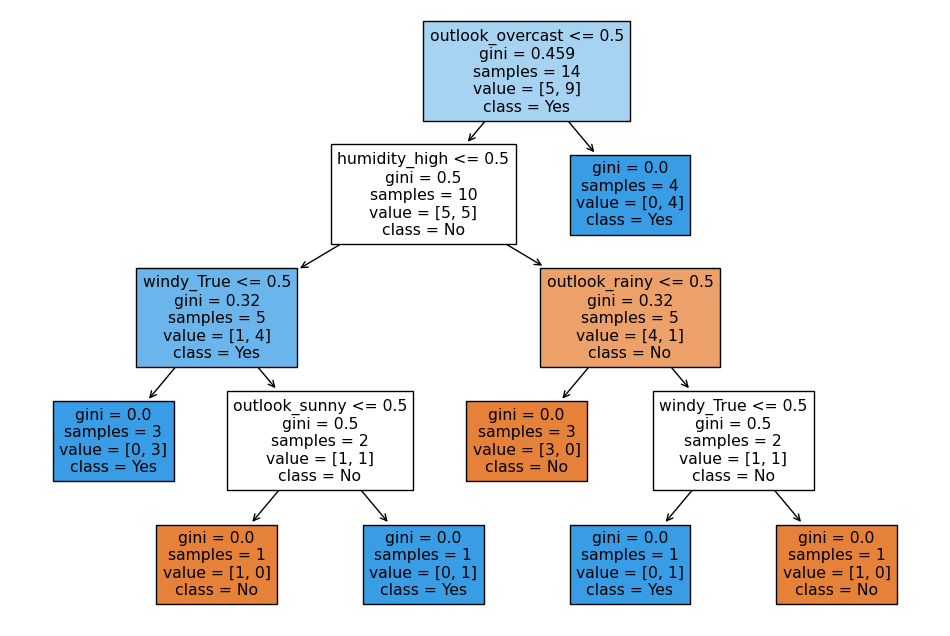

In [6]:
plt.figure(figsize=(12,8))
tree_vis = plot_tree(dt, filled=True, feature_names = feature_names, class_names = class_names)

* The goal here is to make splits that will create pure as possible regions of the feature space.  The Gini coefficient is a statistical measure of how "pure" a class is.  
* By default, DecisionTreeClassifier uses a gini coefficient for classification. The goal of a decision tree is to partition the data into pure classes with gini = 0. 
* This is obviously an overfit model. 

Lets revisit this with an entropy based criterion

In [7]:
dt = DecisionTreeClassifier(criterion = 'entropy').fit(x_train, y_train)

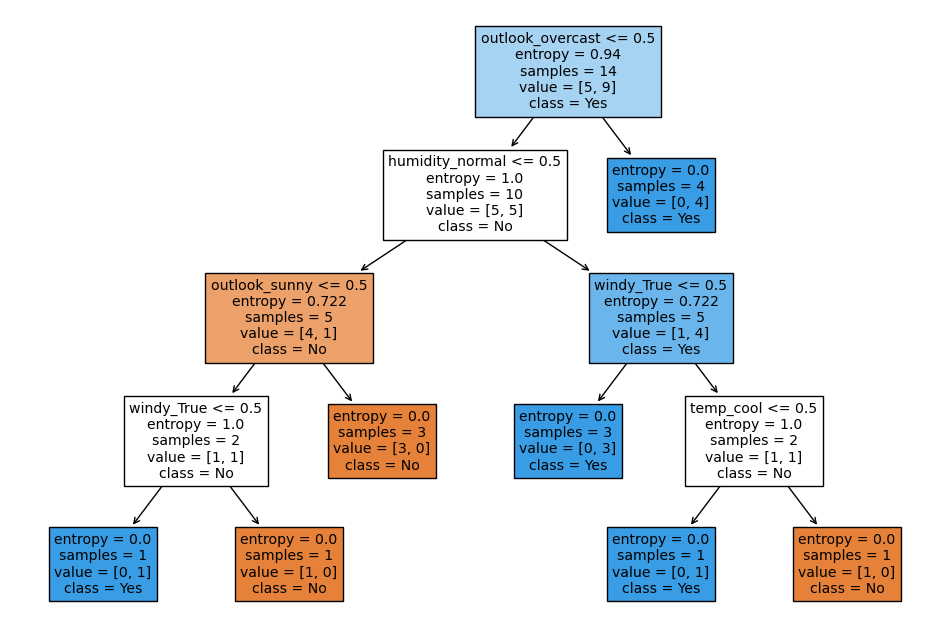

In [8]:
plt.figure(figsize=(12,8))
tree_vis = plot_tree(dt, filled=True, feature_names = feature_names, class_names = class_names)



### Let's revisit the PIMA Indians diabetes data.

In [9]:
# load in the data
pima = pd.read_csv("../data/diabetes.csv")
pima.info()
cols = pima.columns
diabetes = pima['Outcome']
predictors = pima[cols[1:8]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


One way I can specify parameters to prevent overfitting is to specify `max_depth` of the tree 

In [10]:
# isolate out the data we need
X             = np.array(predictors)
y             = diabetes
class_names   = class_names=['Undiagnosed','Diabetes']
feature_names = cols[1:8]

# perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a decision tree classifier with max_depth=2
dt_pima = DecisionTreeClassifier(max_depth=3, random_state=42, criterion = 'entropy')
#dt_pima = DecisionTreeClassifier(min_samples_split =5, random_state=42)

dt_pima.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

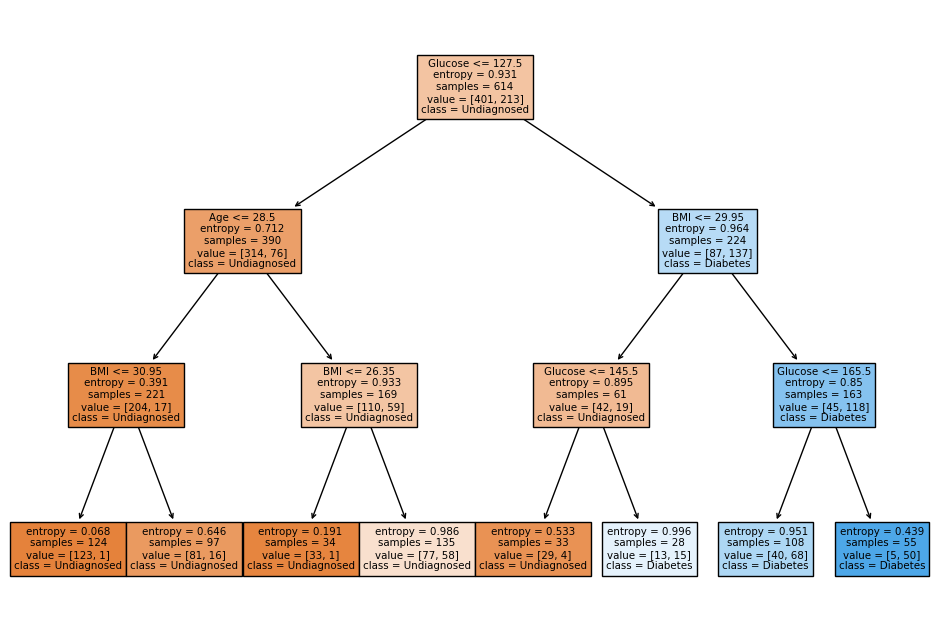

In [11]:
plt.figure(figsize = (12,8))
plot_tree(dt_pima, filled=True, feature_names = feature_names, class_names = class_names)
plt.show()

In [12]:
y_pred = dt_pima.predict(X_test)
print('accuracy score:', accuracy_score(y_test,y_pred))


accuracy score: 0.7662337662337663


In [13]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[83 16]
 [20 35]]


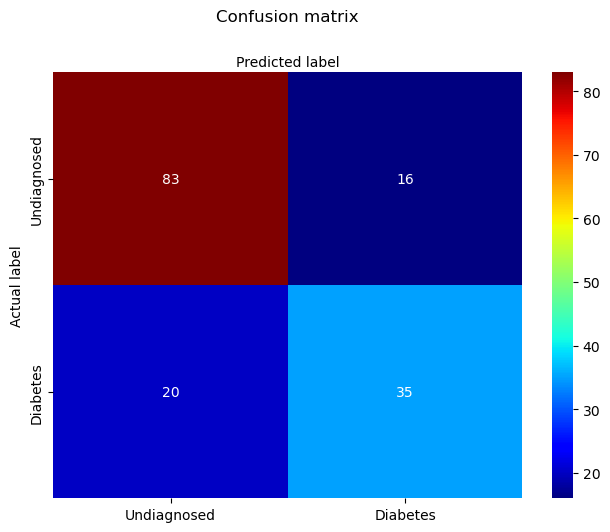

In [14]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

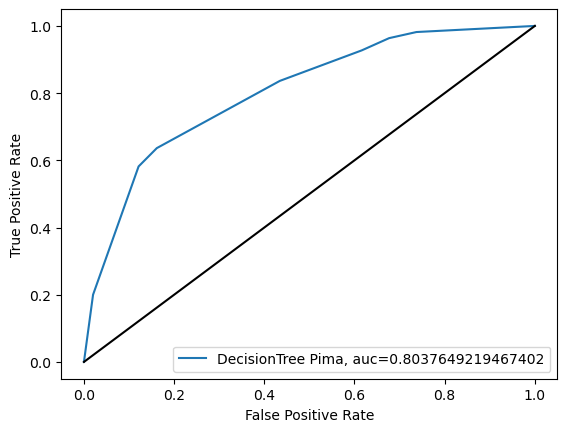

In [15]:
y_pprob = dt_pima.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pprob[:,1])
auc = roc_auc_score(y_test, y_pprob[:,1])
plt.plot(fpr,tpr,label="DecisionTree Pima, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k-')
plt.legend(loc=4)
plt.show()

An alternative way to do is to set the minimum group size to allow splits, `min_samples_split` which allows different branches to acquire different depths. 

All these greedy optimization methods are a bad idea.  

In [16]:
## The right way to do this, might be to make a loop 
#for j in range(2,6)
#    dt = DecisionTreeClassifier(max_depth = j,rand_state = 43)


### Random Forest Classifier
There are two main limitations of decision trees: 
* Decision trees are greedy optimization methods. 
* Manual inspection of a whole set of models with different numbers of features is time consuming. This might be ok when we work with a small number of features. 
There are a number of approaches that have been developed to objectively select a decision tree.  I give an example of a widely used one called a Random Forest. 
The idea behind a random forest is to fit a large number of models, with some randomness

### Random Forests
Random Forest creates ensembles of independent decision trees:
    1. Train each tree on a separate random sample of the full training set
    2. For each tree, at each split, we randomly select a subset of $J^{\prime}$ predictors from the full set of predictors.
    3. From amongst the $J^{\prime}$ predictors, we select the optimal predictor and the optimal corresponding threshold for the split.
    4. The results of all the trees are then averaged together ("voting") to make the prediction.  

In [17]:
from sklearn.ensemble import RandomForestClassifier
n_trees = 100
rf_pima = RandomForestClassifier(n_estimators=n_trees, max_depth=3)
rf_pima.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [18]:
y_pred = rf_pima.predict(X_test)
print('accuracy score: ', accuracy_score(y_test,y_pred))

accuracy score:  0.7792207792207793


In [19]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[89 10]
 [24 31]]


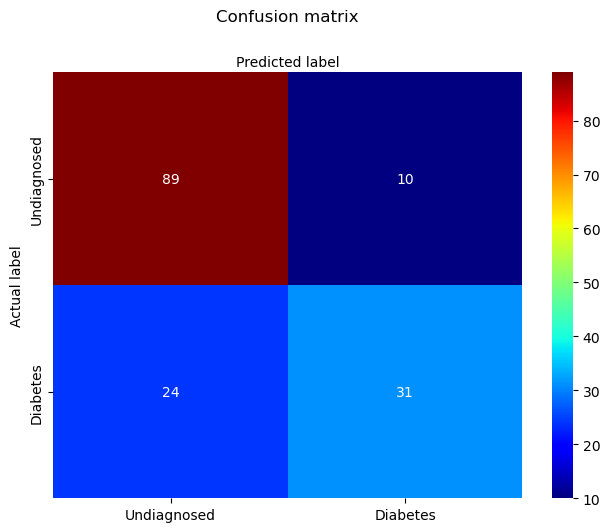

In [20]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

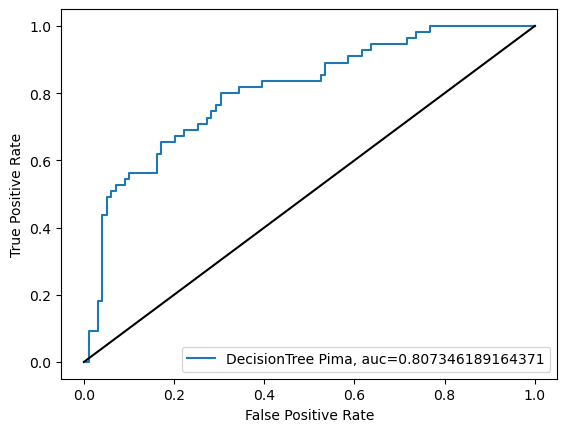

In [21]:
y_pprob = rf_pima.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pprob[:,1])
auc = roc_auc_score(y_test, y_pprob[:,1])
plt.plot(fpr,tpr,label="DecisionTree Pima, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k-')
plt.legend(loc=4)
plt.show()

* You should be able to quickly convince yourself that making a model with a lot of depth does not buy you anything. 
* The whole point is to keep the depth low and aggregate over many shallow models. 
* Wisdom of crowd type of model. 
  

### Classical  Approach to Interpretation. 
* For interpretation, the problem is I cant draw a tree now, because I used 100 trees to make this model.
* What I can do, is to investigate the importance of feature by turing it into noise. Here, we do it by permutation. 
* Measure the loss of performance relative to the original test data.  

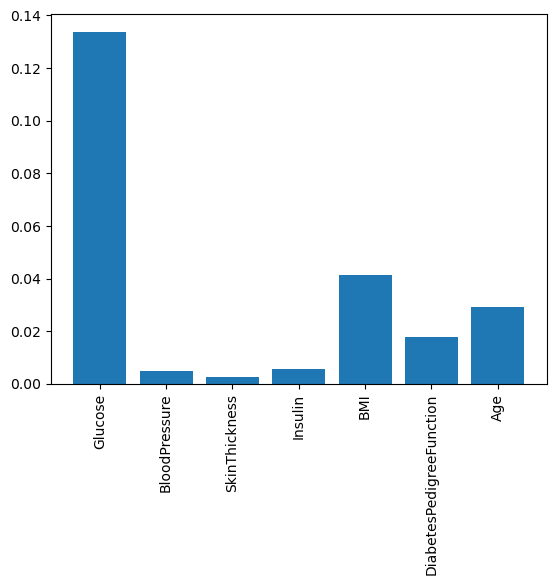

In [30]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf_pima,X_test,y_test,n_repeats = 100)
plt.bar(feature_names,result['importances_mean'])
plt.xticks(feature_names,rotation=90)
plt.show()

### Partial Dependence

Given a set of features $x_s$ and its complement $x_c$, 

$$ pd(x_s) = \int f(x_s,x_c)p(x_c)p(x_c)dx_c $$

Here $f$ is (for example) the prediction probabilty of a given sample. 
Typically we can average this over the training samples.  

In [64]:

from sklearn.inspection import partial_dependence
predictions = partial_dependence(rf_pima, X_train,features = [0],kind = 'average' )

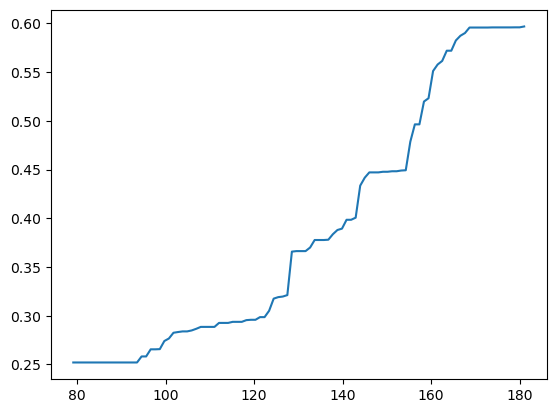

In [66]:
plt.plot(predictions['grid_values'][0],predictions['average'][0])
plt.xlabel('Glucose')
plt.ylabel('Expected Value')
plt.show()

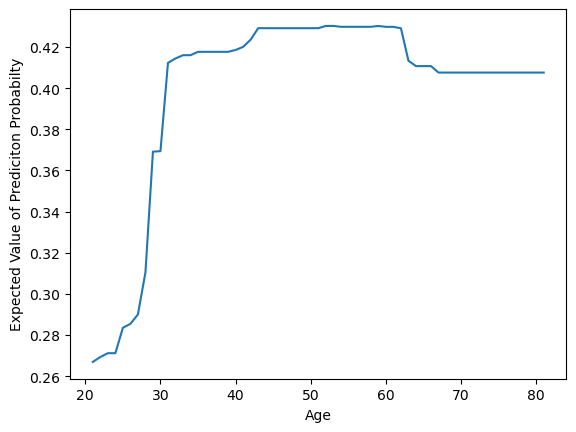

In [69]:
predictions = partial_dependence(rf_pima, X_train,features = [6],kind = 'average' )
plt.plot(predictions['grid_values'][0],predictions['average'][0])
plt.xlabel('Age')
plt.ylabel('Expected Value')
plt.show()

## The limitations of random forest

#### When can Random Forest overfit? 
- Increasing the number of trees in RF generally doesn't increase the risk of overfitting, BUT if the number of trees in the ensemble is too large then the trees in the ensemble may become correlated, and therefore increase the variance.

#### When can Random Forest fail? 

- **When we have a lot of predictors that are completely independent of the response and a few overwhelmingly influential predictor**.


Boosting Classifiers - ADABoost and XGBoost
            
            pip install xgboost

XGboost is not part of sklearn and has to be installed separately.

In [28]:
from sklearn.ensemble import AdaBoostClassifier
#The default is actually a DecisionTreeClassifier with depth 1
#Default is 50 estimators unless a perfect fit is achieved before then. 
boost_pima = AdaBoostClassifier( estimator = DecisionTreeClassifier(max_depth = 1), 
                            algorithm = 'SAMME',n_estimators=50)

# Fit on the entire data
boost_pima.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1))

In [32]:
y_pred = boost_pima.predict(X_test)
print('accuracy score: ', accuracy_score(y_test,y_pred))

accuracy score:  0.7792207792207793
